In [1]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.stats.multitest as smt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [44]:
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'

db = 'vidMac'
# db = 'vidCha'
# db = 'indInd'

file_name = 'MK_test_{}_ncbi/gse.tsv'.format(db)
file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')

df['GOfull'] = df['Description'] + '  ' + df['ID']
df['logpval'] = - np.log10(df['pvalue'])
dos = [1 if x > 0 else -1 for x in df['NES']]
df['dos'] = dos
df['sign_logP'] = df['logpval'] * dos
df.sort_values(by=['sign_logP'], inplace=True, ascending=False)

df.head()

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,GOfull,logpval,dos,sign_logP
0,GO:0071674,mononuclear cell migration,39,0.513963,1.861961,0.000830,0.652944,0.649007,1341,"tags=62%, list=27%, signal=46%",CCL19/MDK/FADD/PDGFD/CH25H/CSF1R/TNFSF11/PECAM...,mononuclear cell migration GO:0071674,3.081046,1,3.081046
2,GO:0044770,cell cycle phase transition,146,0.336337,1.548496,0.002290,0.652944,0.649007,992,"tags=29%, list=20%, signal=24%",RPA2/E2F6/HMGA2/RNASEH2B/TTK/CDC14A/EME1/NDC80...,cell cycle phase transition GO:0044770,2.640086,1,2.640086
3,GO:0000086,G2/M transition of mitotic cell cycle,42,0.486475,1.806370,0.002468,0.652944,0.649007,840,"tags=40%, list=17%, signal=34%",HMGA2/RNASEH2B/TAF2/TPD52L1/FHL1/ORC1/FOXN3/CD...,G2/M transition of mitotic cell cycle GO:0000086,2.607736,1,2.607736
4,GO:0044839,cell cycle G2/M phase transition,45,0.481346,1.800980,0.002968,0.652944,0.649007,854,"tags=40%, list=17%, signal=34%",HMGA2/RNASEH2B/TAF2/TPD52L1/FHL1/ORC1/FOXN3/CD...,cell cycle G2/M phase transition GO:0044839,2.527548,1,2.527548
5,GO:0000075,cell cycle checkpoint signaling,61,0.428461,1.708904,0.003489,0.652944,0.649007,992,"tags=34%, list=20%, signal=28%",RPA2/HMGA2/RNASEH2B/TTK/EME1/NDC80/CRADD/ORC1/...,cell cycle checkpoint signaling GO:0000075,2.457255,1,2.457255


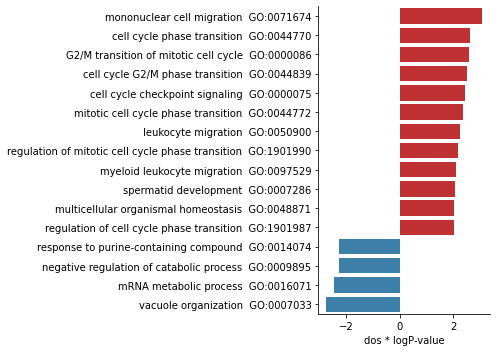

In [45]:
## Plot p-value DoS > 0 and DoS < 0
sns.set_palette(['#2b83ba', '#d7191c'])

fig, axes = plt.subplots(figsize=(7, 5))
# fig, axes = plt.subplots(figsize=(9, 4))
# fig, axes = plt.subplots(figsize=(3, 1.2))

sns.barplot(data=df, x='sign_logP', y='GOfull', hue='dos', dodge=False)
axes.set(xlabel='dos * logP-value', ylabel='')

fig.tight_layout()  
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
axes.legend([], [], frameon=False)

pdf_name = 'MK_test_{}_ncbi/gsea_top_terms.result.pdf'.format(db)
# fig.savefig(pdf_name, bbox_inches='tight')